# Part 1: Linear regression via least squares [13 points]

Recall our motivation for solving linear systems, which came from the linear regression problem as introduced in [an earlier notebook](http://nbviewer.jupyter.org/github/rvuduc/cse6040fa16labs/blob/master/lab7/linalg-motivation.ipynb) and summarized below.

> This notebook goes through a somewhat detailed derivation of the least squares solution to the linear regression problem. You may right ask, why bother with these details when there are canned libraries and numerical routines that do a lot of the heavy-lifting for you? There are three reasons.
>
> 1. It's helpful to have some deeper intuition for how one formalizes a mathematical problem and derives a computational solution, in case you ever encounter a problem that does not exactly fit what a canned library can do for you.
>
> 2. If you have ever used a statistical analysis package, it's likely you have encountered "strange" numerical errors or warnings. Knowing how problems are derived can help you understand what might have gone wrong. We will see an example below.
>
> 3. Because data analysis is undergoing a revolution of interest, it's likely that new problems and new models will not exactly fit the template of existing models. Therefore, it's possible you will need to derive a new model or know how to talk to someone who can derive one for you.

## Formalizing the optimization problem

Your data consists of $m$ observations and $n+1$ variables. One of these variables is the _response_ variable, $y$, which you want to predict from the other $n$ variables, $\{x_1, \ldots, x_n\}$ (note the numbering starts at 1). Suppose you wish to fit a _linear model_ of the following form to these data,

$$y_i \approx \theta_0 + x_{i,1} \theta_1 + x_{i,2} \theta_2 + \cdots + x_{i,n} \theta_n,$$

where $\{\theta_j | 0 \leq j \leq n\}$ is the set of unknown coefficients. Your modeling task is to choose values for these coefficients that "best fit" the data.

You can arrange the observations into a tibble like this one:

|     y      | x<sub>0</sub> | x<sub>1</sub> | x<sub>2</sub> | $\cdots$ | x<sub>n</sub> |
|:----------:|:-------------:|:-------------:|:-------------:|:--------:|:-------------:|
|   $y_0$    |      1.0      |   $x_{0,1}$   |   $x_{0,2}$   | $\cdots$ |   $x_{0,n}$   |
|   $y_1$    |      1.0      |   $x_{1,1}$   |   $x_{1,2}$   | $\cdots$ |   $x_{1,n}$   |
|   $y_2$    |      1.0      |   $x_{2,1}$   |   $x_{2,2}$   | $\cdots$ |   $x_{2,n}$   |
|  $\vdots$  |   $\vdots$    |   $\vdots$    |   $\vdots$    | $\vdots$ |   $\vdots$    |
|  $y_{m-1}$ |      1.0      |  $x_{m-1,1}$  |  $x_{m-1,2}$  | $\cdots$ |  $x_{m-1,n}$  |

This tibble includes an extra dummy variable, $x_0$, whose entries are all equal to 1.0. Treating each variable as a column vector, the modeling tasks is to find the vector $\theta^T \equiv (\theta_0, \theta_1, \ldots, \theta_{n-1})$ such that

$$y \approx X \theta,$$

where $y$ is the vector of responses and $X$ is the $m \times (n+1)$ matrix whose columns are the corresponding vectors, $x_0$, $x_1$, $\ldots$, $x_n$. The matrix $X$ composed this way from the predictors is sometimes referred to as the _(input) data matrix_.

So how should you choose $\theta$? Suppose you are given $\theta$. One way to measure its quality is to look at the difference between $y$ and the _(model) prediction_, $X \theta$. A natural way to measure that difference is to use some vector norm, like the 2-norm (here, squared):

$$ \|X \theta - y\|_2^2 \equiv \|r\|_2^2,$$

where $r \equiv X \theta - y$ is the _residual error vector_ or just _residual_ for this model. Each element of $r$ is the residual for a given observation; thus, using the two-norm means each difference is squared, thereby "penalizing" larger differences more than smaller ones.

> The additional squaring of $\|r\|_2$ could be interpreted similarly, though in reality it is chosen to simplify the math. In particular, recall (or convince yourself) that $\|r\|_2^2 = r^T r$.

Given this error measure, we can now formalize our mathematical goal as an optimization problem: compute the $\theta$ that _minimizes_ this error:

$$ \theta_* = {\arg\min_\theta} \|X \theta - y\|_2^2. $$

## Solving the optimization problem

Recall from calculus that you can minimize (or maximize) a continuous function $f(x)$ in a single variable $x$ by computing its derivative $\left.\frac{df}{dx}\right|_{x=x_*}$, setting it to zero, and then solving for $x_*$.

> **Example.** Let $f(x) \equiv a x^2 + b x + c$. Then its maximum or minimum occurs at
>
> $$
    \left. \frac{df}{dx} \right|_{x=x_*} = 2 a x_* + b = 0,
  $$
>
> or when
> 
> $$
    x_* = -\frac{b}{2 a}.
  $$
>
> To show whether this value is a maximum, a minimum, or a saddle-point, you would look at the second derivative. But let's skip that detail for now.

In the setting of multivariable calculus, the procedure is the same. Let $g(\theta)$ be the (scalar) function to minimize or maximize, where $\theta$ is a vector. The moral equivalent of computing the first-derivative of a scalar function in a single variable is to compute the _gradient_ of the scalar function $g$ with respect to the vector variable $\theta$,

$$
\nabla_\theta g(\theta) \equiv
  \left(\begin{array}{c}
    \frac{\partial g}{\partial \theta_0} \\
    \frac{\partial g}{\partial \theta_1} \\
    \vdots \\
    \frac{\partial g}{\partial \theta_{n-1}}
  \end{array}\right),
$$

where $\frac{\partial g}{\partial \theta_i}$ is the partial derivative of $g$ with respect to $\theta_i$. (To compute a partial derivative with respect to $\theta_i$, take the ordinary derivative with respect to $\theta_i$ while treating all other $\theta_{j \neq i}$ as constants.) The gradient produces a _vector_ of these partial derivatives.

> **Example.** Let $\theta \equiv \left(\begin{array}{c} \theta_0 \\ \theta_1 \end{array}\right)$ and $g(\theta) \equiv \|\theta\|_2^2$. That is,
>
> $$ g(\theta) = \|\theta\|_2^2 \Longrightarrow g(\theta_0, \theta_1) = \theta_0^2 + \theta_1^2. $$
>
> Then,
>
> $$
    \nabla_\theta\, g(\theta)
      = \left(\begin{array}{c}
          \frac{\partial g}{\partial \theta_0} \\
          \frac{\partial g}{\partial \theta_1}
        \end{array}\right)
      = \left(\begin{array}{c}
          \frac{\partial}{\partial \theta_0} (\theta_0^2 + \theta_1^2) \\
          \frac{\partial}{\partial \theta_1} (\theta_0^2 + \theta_1^2)
        \end{array}\right)
      = \left(\begin{array}{c}
          2 \theta_0 \\
          2 \theta_1
        \end{array}\right)
      = 2 \theta.
  $$

From its definition, you should be able to verify the following identities related to the gradient. Below, take $v$ and $w$ to be vectors of length $n$ and $M$ to be an $n \times n$ matrix.

1. $\nabla_v (v^T w) = w$.
2. $\nabla_v (v^T v) = 2v$. (That is, generalize the example above to an $n$-vector.)
3. $\nabla_v (v^T M v) = (M + M^T)v$.

**Computing the optimal parameters, $\theta_*$.** Armed with the gradient, we are now ready to minimize $g(\theta) \equiv \|X \theta - y\|_2^2$.

$$
  \begin{eqnarray}
  \theta_* = \arg\min_\theta \|X \theta - y\|_2^2
    & \implies & \left. \nabla_\theta\, g(\theta) \right|_{\theta_*} = 0,
  \end{eqnarray}
$$

that is,

$$
\begin{eqnarray}
  \nabla_{\theta_*} \|X\theta_* - y\|_2^2
    & = & \nabla_{\theta_*} \left( \theta_*^T X^T X \theta_* - 2 \theta_*^T X^T y + y^T y \right) \\
    & = & 2 (X^T X \theta_* - X^T y) \\
    & = & 0.
\end{eqnarray}
$$

In other words, the $\theta_*$ at the minimum is the solution of $X^T X \theta_* = X^T y$. This system is known as the _normal equations_. If the data matrix $X$ has full rank, then this equation will have a solution.

> Again, we've glossed over the fact that you need one more step to show that $\theta_*$ minimizes the above equation.

## Algorithm 1: Direct solution of the normal equations

The preceding calculation immediately suggests the following numerical algorithm to estimate $\theta_*$. Given $X$ and $y$, carry out these three steps:

1. Form $C \equiv X^T X$.
2. Form $b \equiv X^T y$.
3. Solve $C \theta_* = b$ for $\theta_*$.

Is this a good algorithm? There are at least three dimensions along which we might answer this question.

1. Is it accurate enough?
2. Is it fast enough?
3. Is it memory-efficient enough?

Let's examine these questions by experiment.

# Sample data set: Hypertension

For our experiments, let's use the following data set.

A researcher has collected data on patients with hypertension (high blood pressure). She wishes to know to what extent blood pressure can be predicted from other physiological factors.

> This example comes from: https://onlinecourses.science.psu.edu/stat501/node/346.

Here is the data:

In [4]:
import pandas as pd
from IPython.display import display

In [7]:
VARIABLES = ['BP', 'Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']
df = pd.read_table ('bloodpress.txt', usecols=VARIABLES)
print ("The full dataset consists of {} observations of {} variables.".format (len (df), len (VARIABLES)))
print ("Here are the first few observations ...")
display (df.head ())

The full dataset consists of 20 observations of 7 variables.
Here are the first few observations ...


,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95


The variables are as follows. (See: https://onlinecourses.science.psu.edu/stat501/node/329)

- `BP`: Blood pressure, in millimeters of mercury (mm Hg)
- `Age`: Age in years
- `Weight`: Weight in kilograms
- `BSA`: Body surface area in squared meters
- `Dur`: Duration of hypertension in years
- `Pulse`: Basal pulse in beats per minute
- `Stress`: Stress index

Let's say that our analysis task is to predict blood pressure (`BP`) from weight and body surface area (`Weight` and `BSA`), based on the following observation:

In [8]:
import seaborn as sns

%matplotlib inline

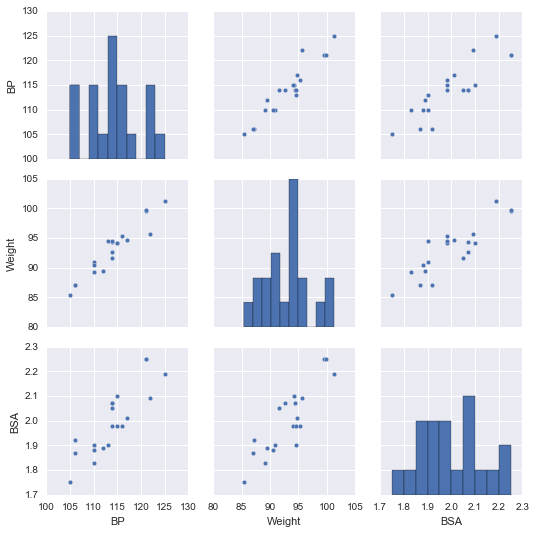

In [9]:
RESPONSE = 'BP'
PREDICTORS = ['Weight', 'BSA']
sns.pairplot (df[[RESPONSE] + PREDICTORS])

If you have some experience with statistics, you'll recognize immediately that a) there is good reason to suspect a relationship (top row), but that b) weight and body surface area are also highly correlated. But let's not worry about that ... for the moment!

# Implementing Algorithm 1: Take 1

Let's start by extracting the response as a vector $y$ and the predictors as a data matrix $X$ (including a dummy column of ones).

In [10]:
import numpy as np

In [12]:
y = df.as_matrix ([RESPONSE])
m = len (y)

X_initial = df.as_matrix (PREDICTORS)
X = np.insert (X_initial, [0], [[1.]] * m, axis=1)

print ("X (first five rows):\n")
print (X[:5])

X (first five rows):

[[  1.    85.4    1.75]
 [  1.    94.2    2.1 ]
 [  1.    95.3    1.98]
 [  1.    94.7    2.01]
 [  1.    89.4    1.89]]


**Exercise 1** (1 points). Form the matrix $C = X^T X$, storing the result in a variable `C` (a Numpy matrix).

In [13]:
C = X.T.dot(X)

print ("Your computed C:\n")
print (C)

Your computed C:

[[  2.00000000e+01   1.86180000e+03   3.99600000e+01]
 [  1.86180000e+03   1.73665440e+05   3.72962500e+03]
 [  3.99600000e+01   3.72962500e+03   8.01940000e+01]]


In [14]:
assert C.shape == (3, 3)

C_soln = np.load ('C_soln.npy')
assert (C - C_soln <= 1e-11).all ()

**Exercise 2** (1 point). Form the vector $b = X^T y$ and store the result in a variable `b`.

In [15]:
b = X.T.dot(y)

print ('Your computed b:')
print (b)

Your computed b:
[[   2280.  ]
 [ 212666.1 ]
 [   4567.63]]


In [16]:
assert b.shape == (3, 1)

b_soln = np.load ('b_soln.npy')
assert (b - b_soln <= 1e-9).all ()

**Exercise 3** (1 point). Solve the resulting system, $C \theta_* = b$ for $\theta_*$. Store your result in a variable, `theta_neq` (for "theta from the normal equations").

In [17]:
theta_neq = np.linalg.solve(C,b)

print ("Your computed optimal parameters, theta_neq:")
print (theta_neq)

Your computed optimal parameters, theta_neq:
[[ 5.65339827]
 [ 1.03873417]
 [ 5.83125024]]


**Exercise 4** (1 point). Compute the residual of this solution, $r = X \theta_* - y$. Store the result in a variable, `r_neq`.

In [19]:
r_neq = X.dot(theta_neq ) -y

print ("Response and your computed residual:")
df_compare = pd.concat ([pd.DataFrame (data=y, columns=['y']),
                         pd.DataFrame (data=r_neq, columns=['r_neq'])],
                        axis=1)
display (df_compare)

r_neq_nsq = np.linalg.norm (r_neq, 2)**2
print ("\nThe squared residual norm:", r_neq_nsq)

Response and your computed residual:


,y,r_neq
0,105,-0.434016
1,115,0.747782
2,116,0.190640
3,117,-1.257663
4,112,-2.462704
5,121,1.127761
6,121,1.439381
7,110,1.153710
8,110,-1.020326
9,114,0.014744



The squared residual norm: 51.7138480497


In [20]:
assert r_neq_nsq <= 52.0
print ("\n(Passed.)")


(Passed.)


## Sources of error

We said before that one question we should ask about our algorithm is whether it is "accurate enough." But what does that mean?

**Exercise 5** (3 points). For any modeling problem, there will be several sources of error. Describe at least three such sources.

- Errors in the data, e.g. if blood pressures are not integers
- Modeling errors, e.g. if the relationship between response and predictors is not linear
- Numerical errors because of limited precision arithmetic - which may accumulate
- Incorrectly coded

One way to begin to understand error in a numerical computation is to consider how sensitive the computed solution is to perturbations to the input.

**Exercise 6** (2 points). Implement a function that returns an $m \times n$ matrix whose entries are uniformly randomly distributed in the interval, $[0, \epsilon]$ for a given value of $\epsilon$.

In [24]:
np.random.seed(6528)
def random_mat (m, n, eps):
    return np.random.uniform(high = eps, size = (m,n))

print (random_mat (3, 2, 1e-3))

[[  8.21053772e-04   4.75559426e-04]
 [  8.65696200e-05   3.09483912e-04]
 [  8.03483172e-04   8.54516263e-04]]


In [30]:
Z = random_mat (5, 3, 1e-2)
assert Z.shape == (5, 3)
assert (Z <= 1e-2).all ()
print ("\n(Passed.)")


(Passed.)


**Exercise 7** (1 point). Use your `random_mat()` function to create a "small perturbation," $\Delta X$, to the input data matrix, $X$. Store this perturbation in a variable, `Delta_X`. The entries of `Delta_X` should lie in the interval $[-\epsilon, \epsilon]$, where $\epsilon$ is given in the code below.

In [31]:
EPSILON = 0.1

Delta_X = random_mat(X.shape[0], X.shape[1], 2. * EPSILON) -EPSILON
Delta_y = random_mat(y.shape[0], y.shape[1], 2. * EPSILON) -EPSILON
Delta_X[:,0] = 0.

print ("First few rows of Delta_X:")
print (Delta_X[:5], "\n  ...")

print ("\nFirst few rows of Delta_y:")
print (Delta_y[:5], "\n  ...")

First few rows of Delta_X:
[[ 0.          0.02873135  0.00307662]
 [ 0.          0.06804398 -0.01298926]
 [ 0.          0.07308944  0.0213944 ]
 [ 0.         -0.08625493  0.05940246]
 [ 0.          0.03914931  0.0754347 ]] 
  ...

First few rows of Delta_y:
[[ 0.03229817]
 [-0.07708568]
 [-0.07059977]
 [-0.0706819 ]
 [ 0.09874526]] 
  ...


In [32]:
assert Delta_X.shape == X.shape
assert (Delta_X[:, 0] <= 1e-15).all ()
assert (np.abs (Delta_X) <= EPSILON).all ()
print ("\n(Passed.)")


(Passed.)


**Exercise 8** (2 points). Create a matrix $X_\epsilon = X + \Delta X$ and a vector $y_\epsilon = y + \Delta y$. Store these results in two variables, `X_eps` and `y_eps`.

From these, the code that follows will create $C_\epsilon \equiv X_\epsilon^T X_\epsilon$ and $b_\epsilon = X_\epsilon^T y_\epsilon$, stored as `C_eps` and `b_eps`, respectively.

In [33]:
X_eps = X+Delta_X
y_eps = y+Delta_y

print ("Your computed X_eps:")
print (X_eps)

print ("\nYour computed y_eps:")
print (y_eps)

C_eps = X_eps.T.dot (X_eps)
print ("\nC_eps:")
print (C_eps)

b_eps = X_eps.T.dot (y_eps)
print ("\nb_eps:")
print (b_eps)

Your computed X_eps:
[[   1.           85.42873135    1.75307662]
 [   1.           94.26804398    2.08701074]
 [   1.           95.37308944    2.0013944 ]
 [   1.           94.61374507    2.06940246]
 [   1.           89.43914931    1.9654347 ]
 [   1.           99.56559065    2.17215059]
 [   1.           99.81148089    2.27543331]
 [   1.           90.87682442    1.82319788]
 [   1.           89.21285942    1.91135344]
 [   1.           92.78763145    2.05849708]
 [   1.           94.30793276    2.05500166]
 [   1.           94.10708878    2.06153   ]
 [   1.           91.57320608    1.9547274 ]
 [   1.           87.0009064     1.8573862 ]
 [   1.          101.30568735    2.16187317]
 [   1.           94.53616925    1.90543433]
 [   1.           86.92271498    1.89066372]
 [   1.           94.56925316    1.97086935]
 [   1.           90.55138727    1.95651521]
 [   1.           95.77625724    2.02650107]]

Your computed y_eps:
[[ 105.03229817]
 [ 114.92291432]
 [ 115.92940023]
 [ 11

In [34]:
X_eps_max = np.abs (X) + EPSILON
y_eps_max = np.abs (y) + EPSILON
C_eps_max = X_eps_max.T.dot (X_eps_max)
b_eps_max = X_eps_max.T.dot (y_eps_max)

delta_C_max = np.max (np.abs (C_eps_max - C))
delta_b_max = np.max (np.abs (b_eps_max - b))

print (delta_C_max / np.max (np.abs (C)), delta_b_max / np.max (np.abs (b)))

assert (np.abs (C_eps - C) <= delta_C_max).all ()
assert (np.abs (b_eps - b) <= delta_b_max).all ()
print ("\n(Passed.)")

0.00214527426988 0.00194850048973

(Passed.)


**Exercise 9** (2 points). Solve the system $C_\epsilon \theta_\epsilon = b_\epsilon$ for $\theta_\epsilon$. Store the result in a variable, `theta_eps`. Also compute the residual, $r_\epsilon = X_\epsilon \theta_\epsilon - y_\epsilon$ and store it as `r_eps`.

> How does the computed solution compare to that of the unperturbed system?

In [35]:
theta_eps = np.linalg.solve(C_eps, b_eps)
r_eps = X_eps.dot(theta_eps) - y_eps

r_eps_nsq = np.linalg.norm (r_eps, 2)**2
print ("The squared-norm of the residual:", r_eps_nsq)

print ("\nYour computed theta_eps, compared to theta_neq:")
display (pd.concat ([pd.DataFrame (data=theta_neq, columns=['theta_neq']),
                     pd.DataFrame (data=theta_eps, columns=['theta_eps'])],
                    axis=1))

The squared-norm of the residual: 53.6321546617

Your computed theta_eps, compared to theta_neq:


,theta_neq,theta_eps
0,5.653398,4.449104
1,1.038734,1.095937
2,5.831250,3.763952


In [31]:
assert r_eps_nsq <= (1.1 * r_neq_nsq)